In [54]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import plotly.express as pplt
import matplotlib.pyplot as plt
from datetime import datetime

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [23]:
# Partial функции как вариант lambda функций

import functools

def add(a,b):
    return a+b
add_part = functools.partial(add, b=2)

In [16]:
get_data = lambda x: DataReader(x, 'yahoo', start='2007-01-01', end=datetime.now())

In [31]:
tickets = ['AAPL', 'MSFT', 'TSLA']

In [33]:
datas = list(map(get_data, tickets))

In [38]:
data = datas[0]

In [39]:
plt.line(data, x=data.index, y='Adj Close')

In [66]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Анализ временных рядов')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5, title='Автокорелляция')
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5, title='Частичная автокорелляция')
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

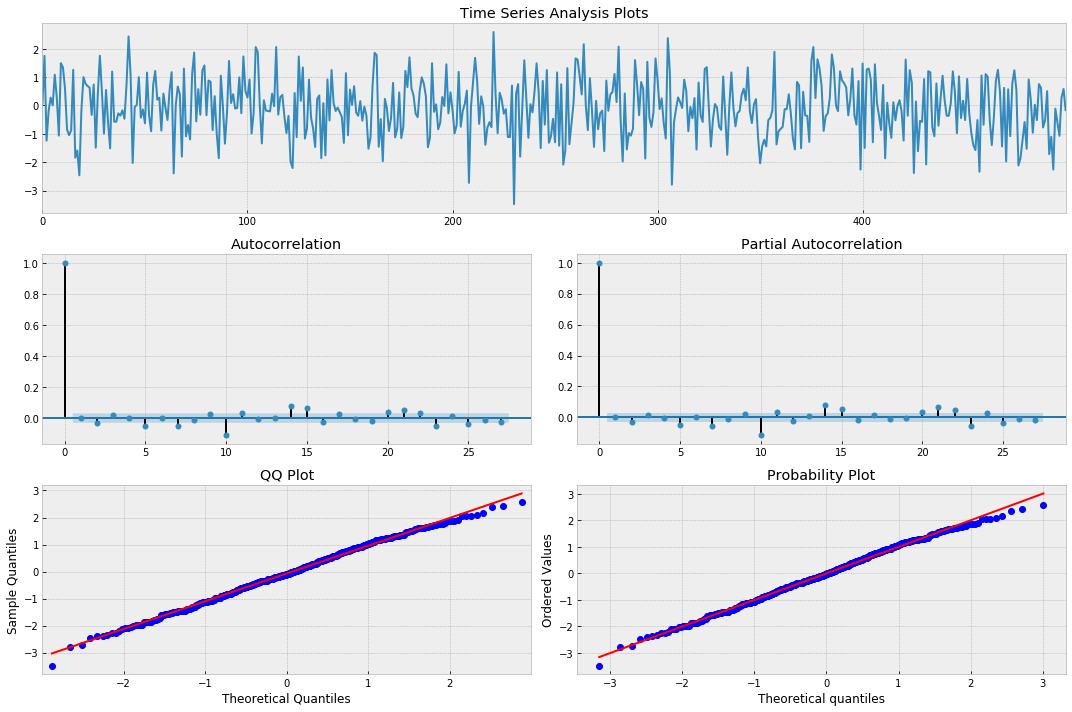

In [63]:
data = np.random.normal(size=500)
tsplot(data, figsize=(15, 10))

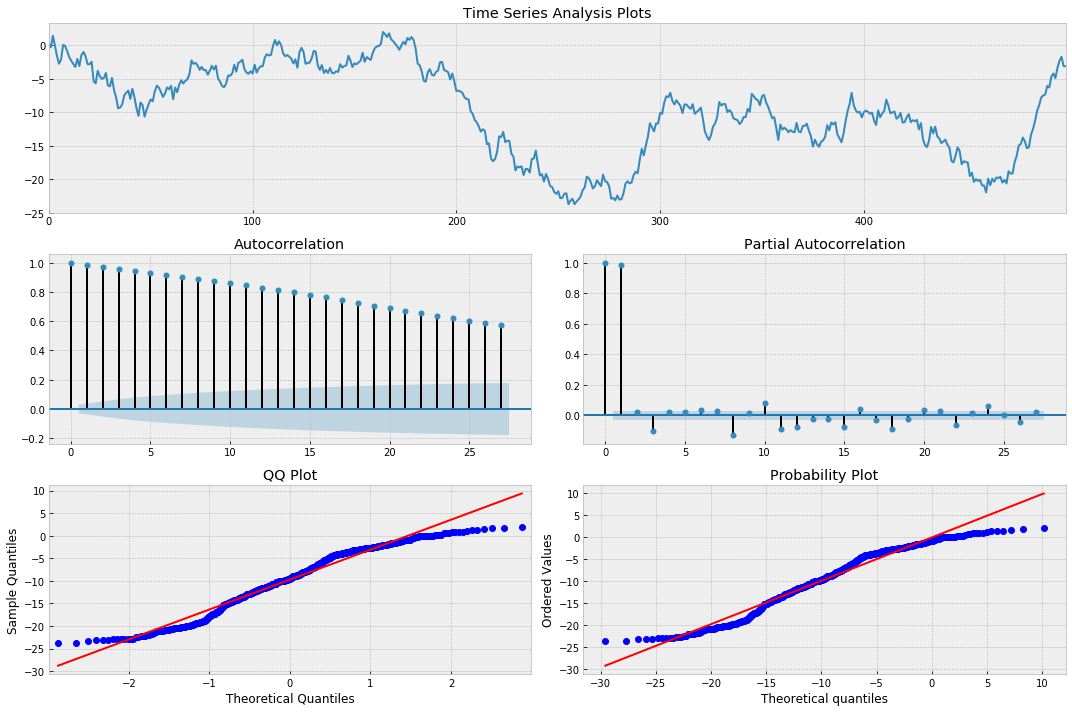

In [62]:
data = np.random.normal(size=500)
for t in range(1, len(data)):
    data[t] = data[t-1] + data[t]
tsplot(data, figsize=(15, 10))

In [64]:
print(f'Mean: {data.mean():.2}\n Var: {data.var():.2}\nStd: {data.std():.2}')

Mean: -0.071
 Var: 1.1
Std: 1.0


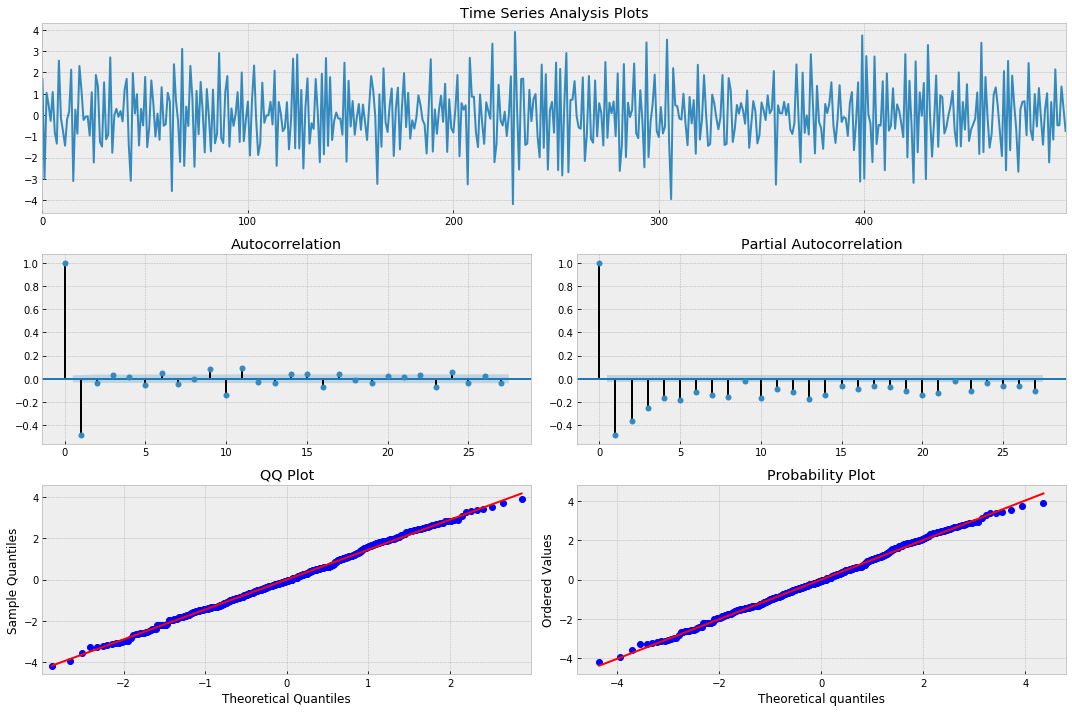

In [65]:
tsplot(np.diff(data), figsize=(15, 10))

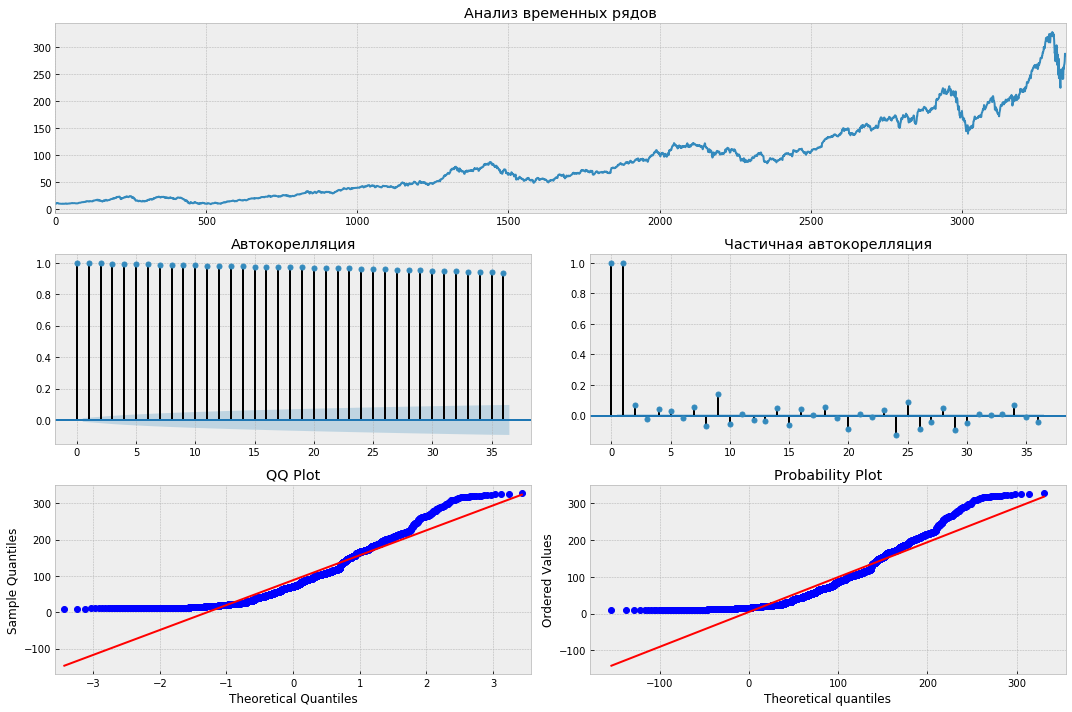

In [72]:
tsplot(datas[0]['Adj Close'].values, figsize=(15, 10))

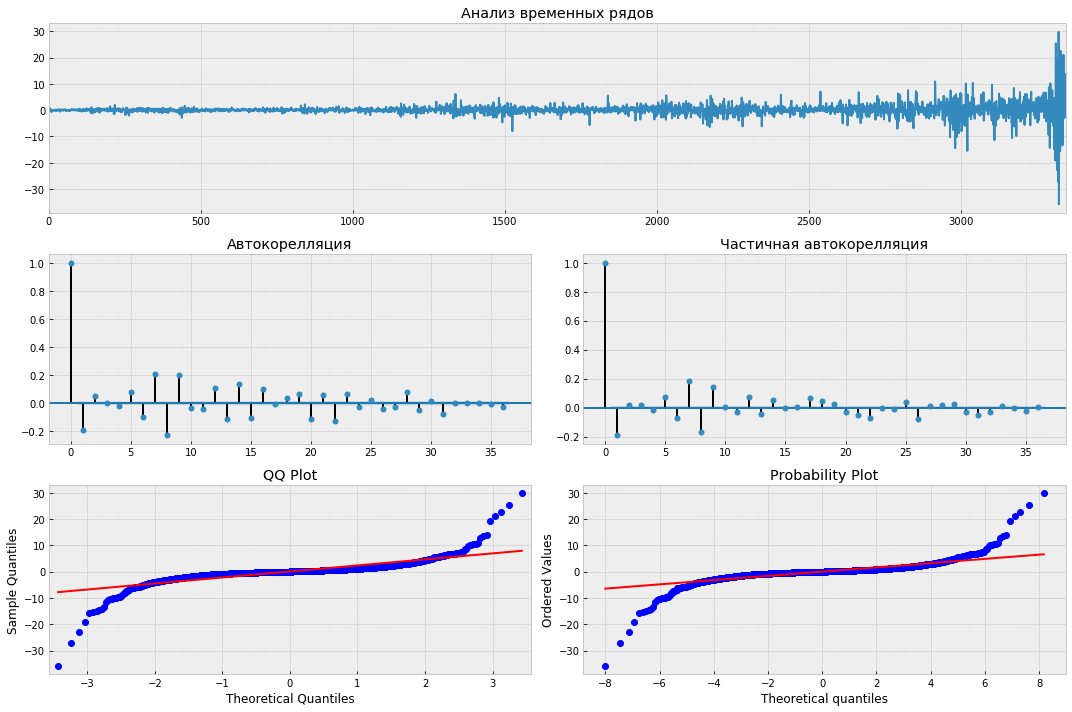

In [71]:
tsplot(np.diff(datas[0]['Adj Close'].values), figsize=(15, 10))

In [84]:
# y = b0 + b1*t + eps

eps = np.random.normal(size=500)

b0 = -1
b1 = 2

y = np.zeros_like(eps)
t = np.cumsum(np.ones_like(eps))-1

y = b0 + b1*t + eps

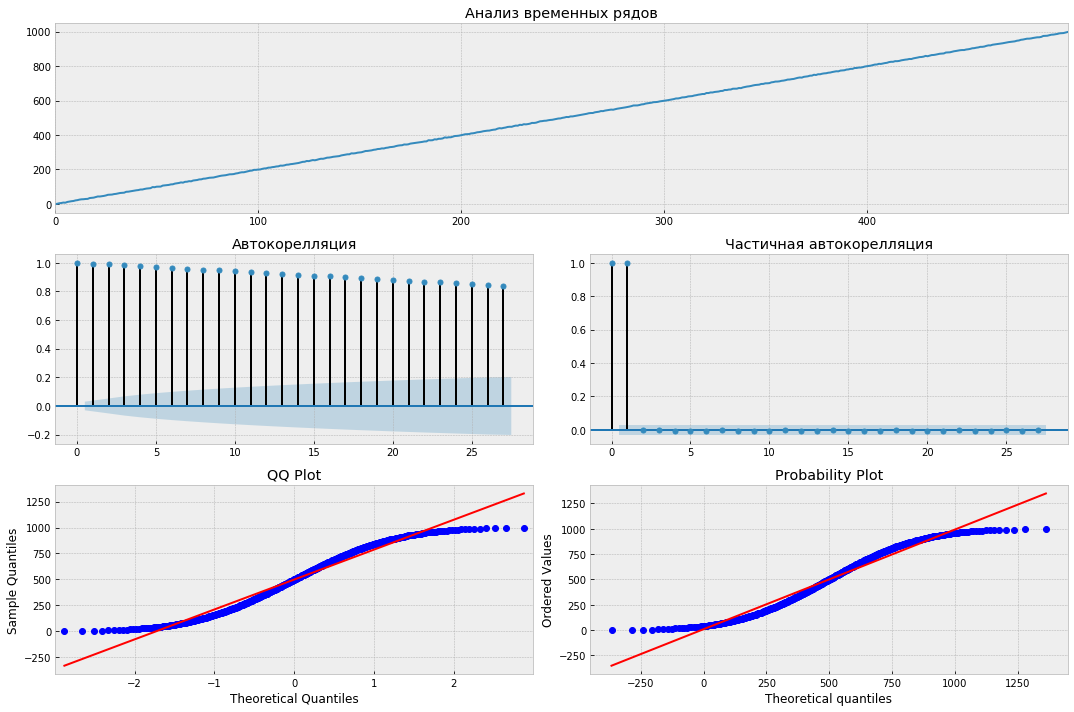

In [85]:
tsplot(y, figsize=(15, 10))

In [90]:
# y = np.exp(t/b1) + eps

eps = np.random.normal(size=100)

b0 = -1
b1 = 12

y = np.zeros_like(eps)
t = np.cumsum(np.ones_like(eps))-1

y = np.exp(t/b1) + eps

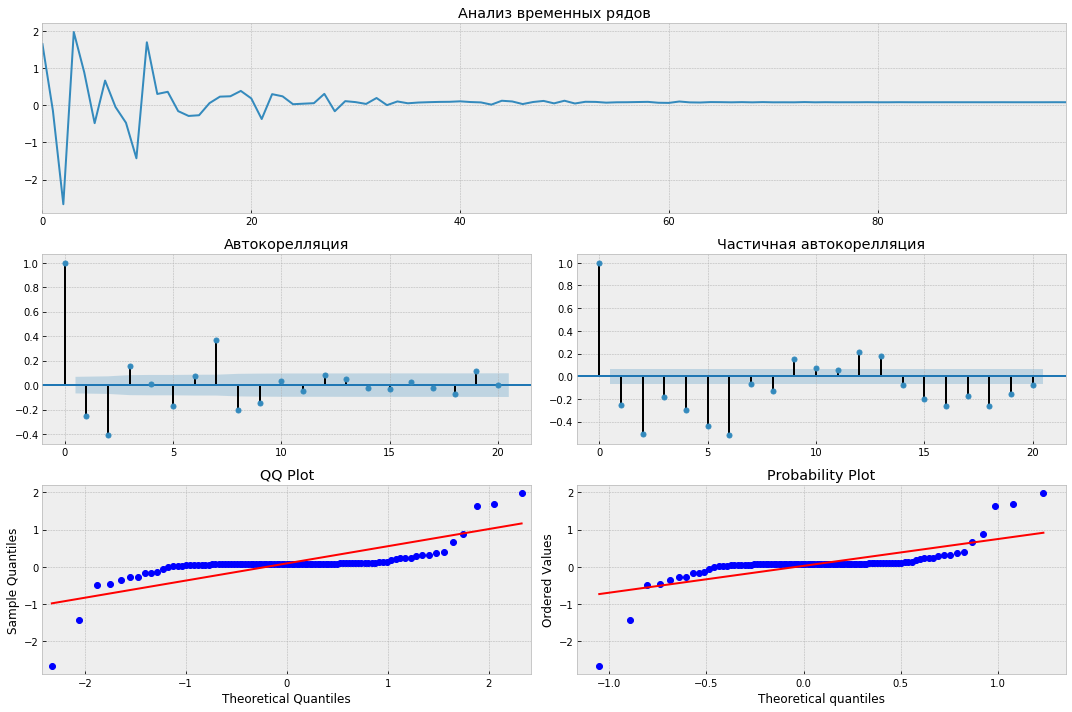

In [93]:
tsplot(np.diff(np.log(y)), figsize=(15, 10))

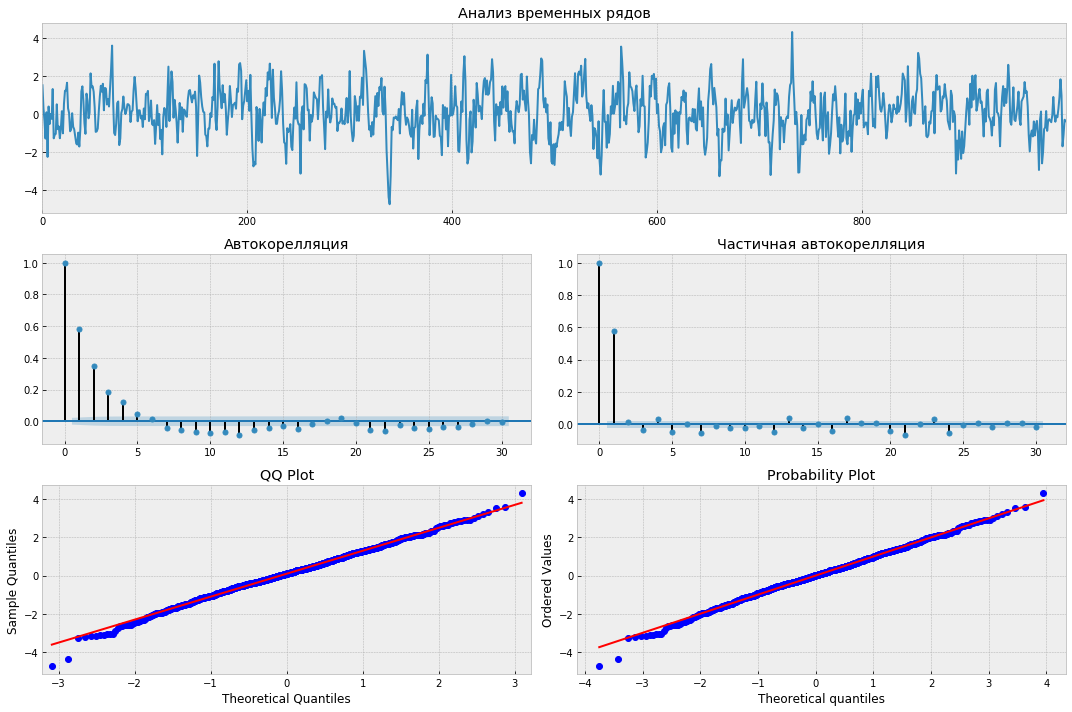

In [97]:
np.random.seed(1)

n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
tsplot(x, figsize=(15, 10), lags=30)

In [111]:
%%time

mdl = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')

print(mdl.params, est_order)

[0.58226614] 1
Wall time: 1min 3s


In [113]:
n = int(1000)
alphas = np.array([.666, -.333])
betas = np.array([0.])

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

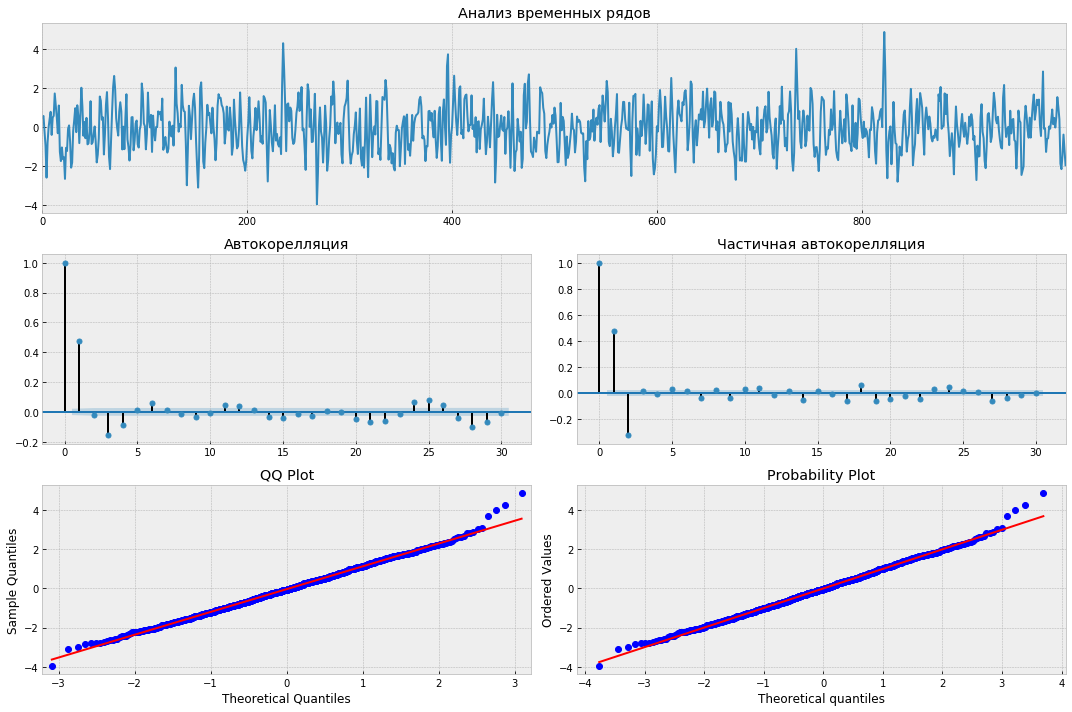

In [115]:
ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
tsplot(ar2, figsize=(15, 10), lags=30)

In [116]:
%%time

mdl = smt.AR(ar2).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(ar2).select_order(maxlag=30, ic='aic', trend='nc')

print(mdl.params, est_order)

[ 0.62905963 -0.31964383] 2
Wall time: 1min 6s
